<a href="https://colab.research.google.com/github/youngolax/Olato_B30927/blob/main/PART_B_QUESTIONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**QUESTION 1 OF PART B**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
# Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [23]:
# Load the training dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Train.csv")

In [24]:
print(data.head())

   id Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
0   0   F   0.550     0.430   0.150        0.7715          0.3285   
1   1   F   0.630     0.490   0.145        1.1300          0.4580   
2   2   I   0.160     0.110   0.025        0.0210          0.0055   
3   3   M   0.595     0.475   0.150        0.9145          0.3755   
4   4   I   0.555     0.425   0.130        0.7820          0.3695   

   Whole weight.2  Shell weight  Rings  
0          0.1465        0.2400     11  
1          0.2765        0.3200     11  
2          0.0030        0.0050      6  
3          0.2055        0.2500     10  
4          0.1600        0.1975      9  


In [25]:
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])

In [26]:
X = data.drop('Rings', axis=1)
y = data['Rings']

In [27]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
# Check how well the model works on the test split
score = model.score(X_test, y_test)
print("Model accuracy (R² score):", score)

Model accuracy (R² score): 0.5947626481341624


Question 2 of part B

In [51]:
# Load the test dataset
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Test.csv")

In [52]:
# Convert 'Sex' to numbers (same as training)
test_data['Sex'] = label_encoder.transform(test_data['Sex'])

In [53]:
# Features for prediction (all columns, no 'Rings')
X_test_new = test_data

In [54]:
# Predict the number of rings
predicted_rings = model.predict(X_test_new)

In [55]:
# Calculate age (age = rings + 1.5)
predicted_age = predicted_rings + 1.5

In [56]:
# Add predictions to the test data
test_data['Predicted_Rings'] = predicted_rings
test_data['Predicted_Age'] = predicted_age

In [57]:
# Show the first few predictions
print(test_data.head())

      id  Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
0  90615    2   0.645     0.475   0.155        1.2380          0.6185   
1  90616    2   0.580     0.460   0.160        0.9830          0.4785   
2  90617    2   0.560     0.420   0.140        0.8395          0.3525   
3  90618    2   0.570     0.490   0.145        0.8740          0.3525   
4  90619    1   0.415     0.325   0.110        0.3580          0.1575   

   Whole weight.2  Shell weight  Predicted_Rings  Predicted_Age  
0          0.3125        0.3005         8.463362       9.963362  
1          0.2195        0.2750         9.881378      11.381378  
2          0.1845        0.2405        10.082293      11.582293  
3          0.1865        0.2350        10.835530      12.335530  
4          0.0670        0.1050         7.997530       9.497530  


In [58]:
# Save the results to a new file
test_data.to_csv("B309927_Olato.csv", index=False)
print("Predictions saved to 'B30927_Olato.csv'")

Predictions saved to 'B30927_Olato.csv'


QUESTION 3 PART B

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [60]:
# Load the dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/PatientReviews.csv"
df = pd.read_csv(file_path)

In [61]:
# Clean column names (remove leading spaces)
df.columns = df.columns.str.strip()

In [62]:
# Convert DateTime to proper datetime format
df["DateTime"] = pd.to_datetime(df["DateTime"])

In [63]:
# Filter data for the specified time range
start_date, end_date = "2017-01-01", "2017-06-30"
filtered_df = df[(df["DateTime"] >= start_date) & (df["DateTime"] <= end_date)]

**QUESTION 4 OF PART B**

In [64]:
# Count occurrences of each action
action_counts = filtered_df["action"].value_counts()

<ipython-input-65-d1f93e163ab1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=action_counts.index, y=action_counts.values, palette="viridis")


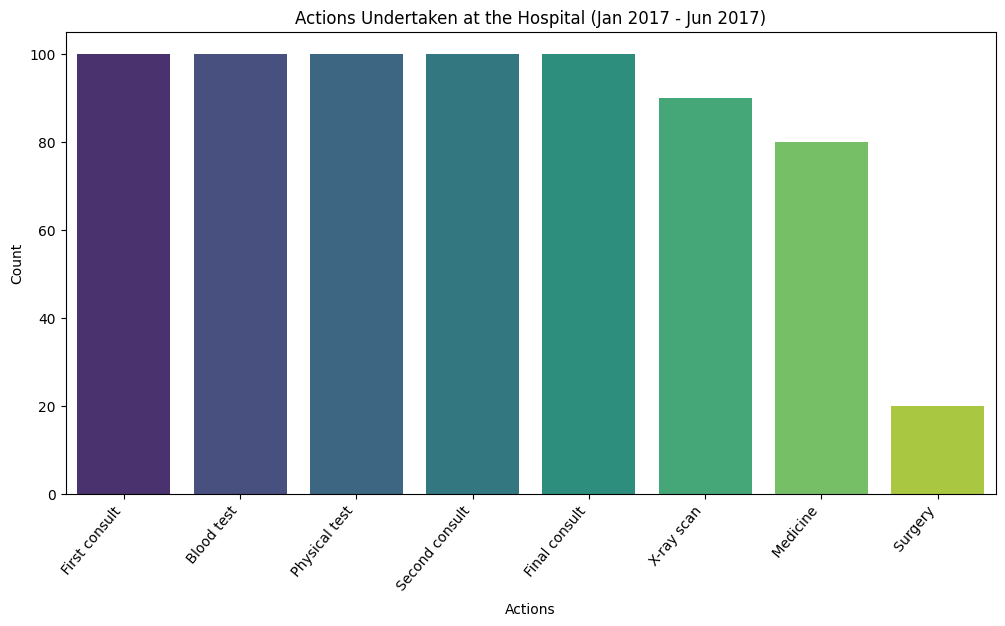

In [65]:
# Plot the actions
plt.figure(figsize=(12, 6))
sns.barplot(x=action_counts.index, y=action_counts.values, palette="viridis")
plt.xticks(rotation=50, ha="right")
plt.xlabel("Actions")
plt.ylabel("Count")
plt.title("Actions Undertaken at the Hospital (Jan 2017 - Jun 2017)")
plt.show()

**QUESTION 5 OF PART B**

In [66]:
!pip install pm4py

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 28.2 MB/s eta 0:00:00
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26097 sha256=1f3df67725d8006bc7593fa7206b9b7448bdf353261aa9c5cb56751e86c05062
  Stored in directory: /root/.cache/pip/wheels/31/d7/d9/eec6891f78cac19a693bd40ecb8365d2f4613318c145ec9816
Successfully built intervaltree


In [67]:
import pm4py

/usr/local/lib/python3.11/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/driver.py", line 314, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))


In [68]:
# Process Mining - Discover Process Model
event_log = filtered_df.rename(columns={"patient": "case:concept:name", "action": "concept:name", "DateTime": "time:timestamp"})


In [69]:
# Convert 'time:timestamp' to datetime objects with the correct format if needed
event_log['time:timestamp'] = pd.to_datetime(event_log['time:timestamp']).dt.tz_localize(None)
event_log = pm4py.format_dataframe(event_log, case_id="case:concept:name", activity_key="concept:name", timestamp_key="time:timestamp")

In [70]:
# Discover Directly-Follows Graph (DFG)
dfg, start_activities, end_activities = pm4py.discover_dfg(event_log)

In [71]:
from pm4py.visualization.dfg import visualizer as dfg_visualizer

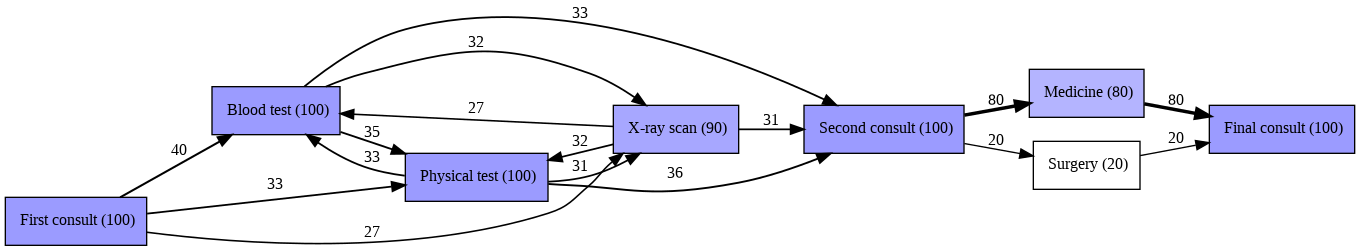

Process flow visualization generated.


In [72]:
# Visualize the process flow
gviz = dfg_visualizer.apply(dfg, log=event_log, variant=dfg_visualizer.Variants.FREQUENCY)
dfg_visualizer.view(gviz)

print("Process flow visualization generated.")